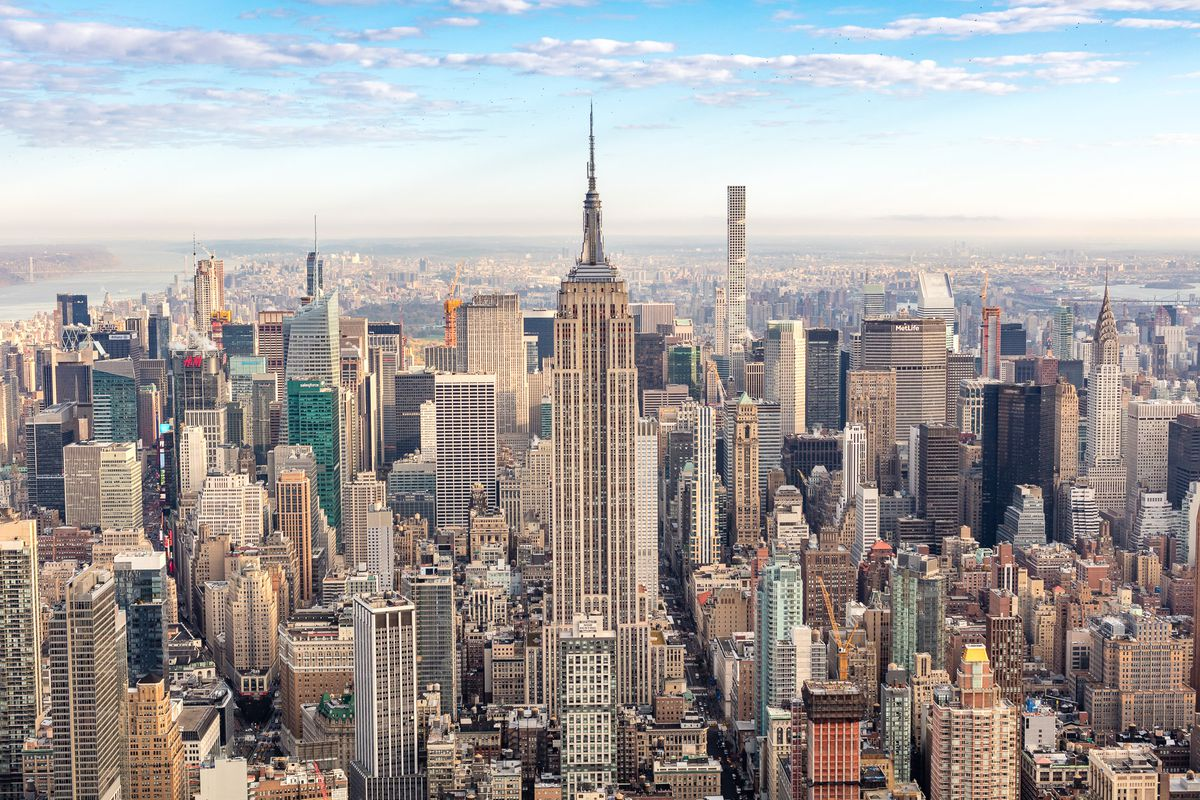

# An Analysis of Airbnb Data from New York City

#### Megha Guggari, Rohit Mandavia, Ngan Nguyen

### Introduction 

Airbnb is a popular tool that has made travel easy with simple/straight-forward room bookings all over the world (fun fact there are over 6 million Airbnb listings worldwide!) However, it is always a headache when trying to figure out the best place to book an Airbnb because you have to factor in things such as price, ratings, availability, and area. Our group chose to analyze Airbnb data from NYC after we realized that we were all travelling to NYC after our exams! We thought about how time-consuming it was to find the perfect Airbnb - one with great reviews, a great price, and one that was actually available! In general, we figured that travelling to NYC is pretty common, and we thought it would be useful to visualize things such as prices, ratings, and availabilities per neighborhood to make room bookings easier. 

Airbnb releases open data for different cities. The data set we used can be found here: 
[NYC Open Airbnb Data](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

In this tutorial, you will be able to see visualizations such as how price relates to neighborhood, how availabilities relate to areas in the city, and how ratings relate to price/neighborhoods, to name a few. This information will hopefully make it easier to make informed decisions about the best place to book an Airbnb! 


Outline of project:
1. Data Collection 
2. Data Preprocessing 
3. Data Visualization 
4. Classification/Prediction 
5. Conclusion 

#### Required Libraries/Tools

For this project, we used the following packages:
1. [Matplotlib](https://matplotlib.org/)
2. [Pandas](https://pandas.pydata.org/)
3. [Folium](https://python-visualization.github.io/folium/)
4. [Numpy](https://numpy.org/)
5. [Sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
6. [Math](https://docs.python.org/3/library/math.html)
7. [Seaborn](https://seaborn.pydata.org/)

In [91]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
import folium
from folium import plugins
from folium.plugins import HeatMap
import numpy as np
from sklearn import linear_model
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Part 1 - Data Collection

For our data collection, we chose a dataset from Kaggle that contained open data from NYC Airbnb. 

Data explanation:
 - **id**: id of the Airbnb
 - **name**: description of the Airbnb
 - **host_id**: id of the host
 - **host_name**: Name of the host
 - **neighbourhood_group**: Neighbourhoods were grouped into 5 groups including:
     - Brooklyn 
     - Manhattan 
     - Bronx
     - Staten Island
     - Queens
 - **neighbourhood**: Specific neighbourhood name
 - **latitude** and **longitude**
 - **room_type**: type of Airbnb rental including:
     - Private Room
     - Entire Home/Apartment
     - Shared Room
 - **price**: Price of the Airbnb for one night
 - **minimum_nights**: minimum number of nights that Airbnb was available
 - **number_of_reviews**: number of reviews for the Airbnb 
 - **last_review**: date of last review
 - **reviews_per_month**: Number of reviews per month (a ratio)
 - **calculated_host_listings_count**: amount of listings per host
 - **availability_365**: number of days available out of the year (out of 365 days)

In [92]:
data = pandas.read_csv("AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Part 2 - Preprocessing

We chose to exclude some columns that were not very informative (ones that we did not think we needed in our analysis). The columns we chose to drop were as follows:

1. id
2. name
3. host_id
4. last_review
5. calculated_host_listings_count

As our second preprocessing step, we chose to eliminate rows based on if the prices seemed unreasoable. This included if the prices were listed anywhere between 0-25 (a price that low seemed less common for NYC, especially), or if the prices were listed to be above 250 per night (as college students we wanted to keep prices that were more common). 

In [93]:
data = data.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review', 'calculated_host_listings_count'])

data = data[data['price'] >= 25]
data = data[data['price'] <= 250]

data = data.dropna()
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,129
...,...,...,...,...,...,...,...,...,...,...
48782,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,1.00,147
48790,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,1.00,339
48799,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,1.00,87
48805,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2.00,40


### Part 3 - Visualization

The different things we chose to visualize are as follows:

1. Room Type vs Price 
2. Room Type vs Availability
3. Map based on Rating vs Area
4. Map based on Price vs Area
5. Map based on Availability vs Area 

In [ ]:
#1 Room Type vs Price
data_by_roomtype = data.sort_values(["room_type"])
room_types = data_by_roomtype["room_type"].unique()


sums = {"entire": 0, "private": 0, "shared": 0}
tally = {"entire": 0, "private": 0, "shared": 0}
averages = {}

def generate_bar_plot(row, sortBy):
    global sums, tally
    if(row["room_type"]=="Entire home/apt"):
        sums["entire"]+=row[sortBy]
        tally["entire"]+=1
    elif(row["room_type"]=="Private room"):
        sums["private"]+=row[sortBy]
        tally["private"]+=1
    elif(row["room_type"] == "Shared room"):
        sums["shared"]+=row[sortBy]
        tally["shared"]+=1

# data_by_roomtype.apply(generate_bar_plot, axis=1)
for index, row in data_by_roomtype.iterrows():
    generate_bar_plot(row, "price") 

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())

plt.title("Rental Type vs Nightly Rate")
plt.ylabel("Nightly Rate")
plt.xlabel("Rental Type")

In [ ]:
averages

As expected, the rental price for booking an entire apartment or home is significantly more expensive than the other types of rooms.

In [ ]:
#2 Room_type vs availability

for index, row in data_by_roomtype.iterrows():
    generate_bar_plot(row, "availability_365") 

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())
plt.title("Rental Type vs Availability")
plt.ylabel("Availability out of 365 days")
plt.xlabel("Rental Type")

Overall, it is apparent that booking an entire home or apartment is more available in NYC. This was a little surprising to us because our guess would have been that private room bookings would be more available (since we figured that travelling in smaller groups was more common). 

In [ ]:
averages

In [ ]:
#3 Map based on rating

# How to group by neighborhood group and then see the data?
m = folium.Map(location=[40.49, -74.24], zoom_start=11)
df = pandas.DataFrame(data)
df = df.sample(n = 1000)

for i in range(0, len(df)):

    if df.iloc[i]['number_of_reviews'] >= 0 and df.iloc[i]['number_of_reviews'] < 100:
        c = 'darkred'
    elif df.iloc[i]['number_of_reviews'] >= 100 and df.iloc[i]['number_of_reviews'] < 200:
        c = 'black'
    elif df.iloc[i]['number_of_reviews'] >= 200 and df.iloc[i]['number_of_reviews'] < 300:
        c = 'orange'
    elif df.iloc[i]['number_of_reviews'] >= 300 and df.iloc[i]['number_of_reviews'] < 400:
        c = 'white'
    elif df.iloc[i]['number_of_reviews'] >= 400 and df.iloc[i]['number_of_reviews'] < 500:
        c = 'green'
    elif df.iloc[i]['number_of_reviews'] >= 500 and df.iloc[i]['number_of_reviews'] < 600:
        c = 'blue'
    elif df.iloc[i]['number_of_reviews'] >= 600 and df.iloc[i]['number_of_reviews'] < 700:
        c = 'purple'
        
    folium.Circle(
        radius=5,
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup= df.iloc[i]['neighbourhood_group'],
        color=c,
        fill=False,
    ).add_to(m)
    
m 

Overall, the number of reviews are between 0-100. There is not a huge apparent pattern between the location of the reviews and the number of reviews as we had thought there would be. However, from the sample, it seems that there is a higher chance of more reviews being farther away from the actual city, such as the Queens area. To see if this is actually the case, we decided to plot data specific to Queens and Brooklyn (which we have shown below). 

In [ ]:
# Map of ratings for "Queens" neighbourhood 

m = folium.Map(location=[40.49, -74.24], zoom_start=11)
df = pandas.DataFrame(data)
df = df.loc[df['neighbourhood_group'] == "Queens"]
df = df.sample(n=1000)

for i in range(0, len(df)):

    if df.iloc[i]['number_of_reviews'] >= 0 and df.iloc[i]['number_of_reviews'] < 100:
        c = 'darkred'
    elif df.iloc[i]['number_of_reviews'] >= 100 and df.iloc[i]['number_of_reviews'] < 200:
        c = 'black'
    elif df.iloc[i]['number_of_reviews'] >= 200 and df.iloc[i]['number_of_reviews'] < 300:
        c = 'orange'
    elif df.iloc[i]['number_of_reviews'] >= 300 and df.iloc[i]['number_of_reviews'] < 400:
        c = 'white'
    elif df.iloc[i]['number_of_reviews'] >= 400 and df.iloc[i]['number_of_reviews'] < 500:
        c = 'green'
    elif df.iloc[i]['number_of_reviews'] >= 500 and df.iloc[i]['number_of_reviews'] < 600:
        c = 'blue'
    elif df.iloc[i]['number_of_reviews'] >= 600 and df.iloc[i]['number_of_reviews'] < 700:
        c = 'purple'
        
    folium.Circle(
        radius=5,
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup= df.iloc[i]['neighbourhood_group'],
        color=c,
        fill=False,
    ).add_to(m)
    
m 

Still as before, the majority of reviews are between 0-100. However, it seems like there is a little more green (reviews between 400-500) than the overall map. However, with just a sample of 1000 it is hard to generalize. 

In [ ]:
# Map of ratings for "Brooklyn" neighbourhood 

m = folium.Map(location=[40.49, -74.24], zoom_start=11)
df = pandas.DataFrame(data)
df = df.loc[df['neighbourhood_group'] == "Brooklyn"]
df = df.sample(n=1000)

for i in range(0, len(df)):

    if df.iloc[i]['number_of_reviews'] >= 0 and df.iloc[i]['number_of_reviews'] < 100:
        c = 'darkred'
    elif df.iloc[i]['number_of_reviews'] >= 100 and df.iloc[i]['number_of_reviews'] < 200:
        c = 'black'
    elif df.iloc[i]['number_of_reviews'] >= 200 and df.iloc[i]['number_of_reviews'] < 300:
        c = 'orange'
    elif df.iloc[i]['number_of_reviews'] >= 300 and df.iloc[i]['number_of_reviews'] < 400:
        c = 'white'
    elif df.iloc[i]['number_of_reviews'] >= 400 and df.iloc[i]['number_of_reviews'] < 500:
        c = 'green'
    elif df.iloc[i]['number_of_reviews'] >= 500 and df.iloc[i]['number_of_reviews'] < 600:
        c = 'blue'
    elif df.iloc[i]['number_of_reviews'] >= 600 and df.iloc[i]['number_of_reviews'] < 700:
        c = 'purple'
        
    folium.Circle(
        radius=5,
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup= df.iloc[i]['neighbourhood_group'],
        color=c,
        fill=False,
    ).add_to(m)
    
m 

The majority of reviews are between 0-100. It is interesting to note that while Queens had a slightly higher chance of showing the green dots that showed 400-500 reviews, this area does not have any (indiciating that it might be less likely). 

In [ ]:
#4 Map based on Price vs Area

data_price_sample = data.sample(n=1000)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=14)
heat_data = []
for index, row in data_price_sample.iterrows():
    loc_price = []
    lat = row['latitude']
    long = row['longitude']
    price = row['price']
    loc_price.append(lat)
    loc_price.append(long)
    loc_price.append(price)
    heat_data.append(loc_price)
    
HeatMap(heat_data, max_val=10000).add_to(m)
m

In [ ]:
#5 Map based on Available Airbnbs vs Area

data_price_sample = data.sample(n=1000)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=14)
heat_data = []
for index, row in data_price_sample.iterrows():
    loc_availability = []
    lat = row['latitude']
    long = row['longitude']
    availability_365 = row['availability_365']
    loc_availability.append(lat)
    loc_availability.append(long)
    loc_availability.append(-availability_365)
    heat_data.append(loc_availability)
    
HeatMap(heat_data, max_val=0).add_to(m)
m

In [ ]:
map_hooray = folium.Map(location=[40.7, -73.9],
                    zoom_start = 10) 

df_acc = data 
# Ensure you're handing it floats
df_acc['latitude'] = df_acc['latitude'].astype(float)
df_acc['longitude'] = df_acc['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[df_acc['reviews_per_month']>5] # Reducing data size so it runs faster# Reducing data size so it runs faster
heat_df = heat_df[['latitude', 'longitude', 'price']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'price'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df["price"]>20*i][heat_df["price"]<20*(i+1)].iterrows()] for i in range(0, 50)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.7)
hm.add_to(map_hooray)
# Display the map
map_hooray

# heat_df

The Heatmap/timeseries above plots the locations of airbnbs based on increasing price. The first frame plots Airbnbs with a nightly rate less than 20 dollars and then each subsequent frame goes up by 20 dollars. This helps us get an idea of where the cheaper and more expensive airbnbs might be. 

### Mean, Median, and Standard Deviation Analysis

We also chose to measure Mean, Median, and Standard Deviations to have a more simple yet informative statistical analysis to get more insight into some of the data including:
1. Price
2. Number of Reviews per Month
3. Number of Reviews (overall)
4. Availabilities 

In [ ]:
print("---------------Price-------------")
print("Mean: " + str(np.mean(data["price"])))
print("Median: " + str(np.median(data["price"])))
print("Standard Deviation: " + str(np.std(data["price"])))

The mean price is around $112 per night which seems to be standard for a big city. As we saw in our analysis before, the prices of renting out an entire apartment or home is still more expensive than the other types of Airbnbs. 

In [ ]:
print("---------------Number of Reviews per Month-------------")
print("Mean: " + str(np.mean(data["reviews_per_month"])))
print("Median: " + str(np.median(data["reviews_per_month"])))
print("Standard Deviation: " + str(np.std(data["reviews_per_month"])))

In [ ]:
print("---------------Number of Reviews-------------")
print("Mean: " + str(np.mean(data["number_of_reviews"])))
print("Median: " + str(np.median(data["number_of_reviews"])))
print("Standard Deviation: " + str(np.std(data["number_of_reviews"])))

We expected there to be more reviews for each Airbnb (because we figured that travelling to NYC was common and that people would be leaving more informative reviews for each Airbnb). An interesting thing to test to find out more information about these reviews would be to determine if the reviews were mainly positive or negative, and to see if this had any relationship to the neighbourhood area or price of the Airbnb. 

In [ ]:
print("---------------Availability-------------")
print("Mean: " + str(np.mean(data["availability_365"])))
print("Median: " + str(np.median(data["availability_365"])))
print("Standard Deviation: " + str(np.std(data["availability_365"])))

Airbnb's are generally available for 1/3 of the entire year! As further analysis, it would be intersting to determine if there are certain times during the year where Airbnb's happen to be the most available as compared to other times. For example, are they more available during the holiday season?

### More Statistical Analysis Below

In [ ]:
neighbourhood_averages = {}

for row in data.iterrows():
    if row[1][5] in neighbourhood_averages:
        neighbourhood_averages[row[1][1]][0]+=1
        neighbourhood_averages[row[1][1]][1]+=row[1][9]
    else:
        neighbourhood_averages[row[1][1]] = [1, row[1][9]]
neighbourhood_averages

In [ ]:
data

In [ ]:
manhattan_mean = data[data["neighbourhood_group"]=="Manhattan"].price.mean()
brooklyn_mean = data[data["neighbourhood_group"]=="Brooklyn"].price.mean()
queens_mean = data[data["neighbourhood_group"]=="Queens"].price.mean()
staten_mean = data[data["neighbourhood_group"]=="Staten Island"].price.mean()
bronx_mean = data[data["neighbourhood_group"]=="Bronx"].price.mean()

In [ ]:
def replace_neighbourhood(n):
    if(n == "Manhattan"): 
        return manhattan_mean
    elif(n == "Brooklyn"): 
        return brooklyn_mean
    elif(n == "Queens"): 
        return queens_mean
    elif(n == "Staten Island"): 
        return staten_mean
    elif(n == "Bronx"): 
        return bronx_mean
    
def replace_type(t):
    if(t == "Entire home/apt"):
        return averages["entire"]
    elif(t == "Private room"):
        return averages["private"]
    elif(t == "Shared room"):
        return averages["shared"]

In [ ]:
pre = data.drop(['minimum_nights','availability_365'], axis=1)
pre.neighbourhood_group = pre["neighbourhood_group"].apply(replace_neighbourhood)
pre.room_type = pre["room_type"].apply(replace_type)

In [ ]:
neighbourhood_averages2 = {}
for k in neighbourhood_averages:
    neighbourhood_averages2[k] = neighbourhood_averages[k][1]/neighbourhood_averages[k][0]

In [ ]:
def neighbourhood_change(n):
    global neighbourhood_averages2
    return neighbourhood_averages2[n]

pre.neighbourhood = pre["neighbourhood"].apply(neighbourhood_change)

pre

### Violin Plot

In [ ]:
violin = sns.violinplot(data=data, x='neighbourhood_group', y='price')
violin.set_title('Density and distribution of prices for each neighberhood_group')

The Violin plots above show the price distribution of Airbnbs in the 5 bouroughs of NYC. All of the bouroughs, except for Manhattan, are clearly unimodal with the modes falling in the 40-60 dollar range. Manhattan, however, has a much more even distribution suggesting that the prices are going to be much more expensive, on average, than in the other bouroughs. It is important that our model takes this into account!

## Part 4 - Classification 

In [ ]:
data_x = pre[["neighbourhood", "neighbourhood_group", "latitude", "longitude"]]
y = pre.price

X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2)


reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

predicts = reg.predict(X_test)

print("""
        Mean Absolute Error: {}
        Root Mean Squared Error: {}
        R2 Score: {}
     """.format(mean_absolute_error(y_test,predicts),np.sqrt(mean_squared_error(y_test, predicts)),r2_score(y_test,predicts),))

For the first linear regression we used 4 features. These are all the features that are related to geographic location since location is often a huge factor when it comes to determining a price for a home or apartment. While the MAE and RMSE were very reasonable but the R^2 score was only 0.14 which is not desireable. This suggested we needed to add more features if we are to continue with linear regression

In [ ]:
data_x = pre[["neighbourhood", "latitude", "longitude"]]
y = pre.price

X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2)


reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

predicts = reg.predict(X_test)

print("""
        Mean Absolute Error: {}
        Root Mean Squared Error: {}
        R2 Score: {}
     """.format(mean_absolute_error(y_test,predicts),np.sqrt(mean_squared_error(y_test, predicts)),r2_score(y_test,predicts),))

a = reg.coef_
i = reg.intercept_

We first tried to remove the neighbourhood features since neighbourhood and neighbourhood_group are related. In fact, the neighbourhood group is just a more precise version of the neighbourhood. However, the R^2 value only decreased so this was not a good move. From then on we decided to include both the neithbourhood and the neighbourhood group.

In [ ]:
data_x = pre.drop(["price"], axis=1)
y = pre.price

X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2)


reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

predicts = reg.predict(X_test)

print("""
        Mean Absolute Error: {}
        Root Mean Squared Error: {}
        R2 Score: {}
     """.format(mean_absolute_error(y_test,predicts),np.sqrt(mean_squared_error(y_test, predicts)),r2_score(y_test,predicts),))

Next, we simply tried to include all the features as there is likely some correlations between the availability, reviews, etc... on the price of an airbnb. This would allow the linear regression to have as meany features as possible and adjust the weights based on them. We were afraid that including all the features may not help more than the geographic features alone but the R^2 value jumped all the way up to 0.48.

In [ ]:
data_x = pre.drop(["price", "number_of_reviews", "reviews_per_month"], axis=1)
y = pre.price

X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

predicts = reg.predict(X_test)

print("""
        Mean Absolute Error: {}
        Root Mean Squared Error: {}
        R2 Score: {}
     """.format(mean_absolute_error(y_test,predicts),np.sqrt(mean_squared_error(y_test, predicts)),r2_score(y_test,predicts),))

a = reg.coef_
i = reg.intercept_

Lastly, we felt that the review based features may not be accurate predictors considering that an airbnb may have a lot of reviews for bring really good or for being really bad. This would suggest that it would not be a great predictor so we tried a linear regression without these features and the statistics essentially remained the same. This suggests that number and frequency of reviews are not a great feature to use for this particular dataset.

### Conclusion



Through our data and analysis we can infer that the price of an Airbnb room is higher in Manhattan than the other 4 neighborhoods (Brooklyn, Queens, Staten Island, and Bronx). This could be due to higher tourist activities in Manhattan.


Our data and analysis can be used to help people, such as travelers, find places to stay in New York City that meet their preferences in terms of neighborhood, availability, and price. It can also be used to predict the price of an Airbnb room that meets their preference.

For future research we plan on predicting the popularity of an Airbnb room based on its attributes such as room type, neighborhood and availability. This analysis could be beneficial for audiences that want to list their homes in the New York City area and want to know the success rate.

To improve on our data and analysis we can add more attributes that would provide better insights and linear regression predictions. For example, we can include crime rate in each neighborhood group and neighborhood to see if it has an effect on the price and popularity of an Airbnb room. We can also include the exact square footage of an Airbnb room to better predict it's price value.